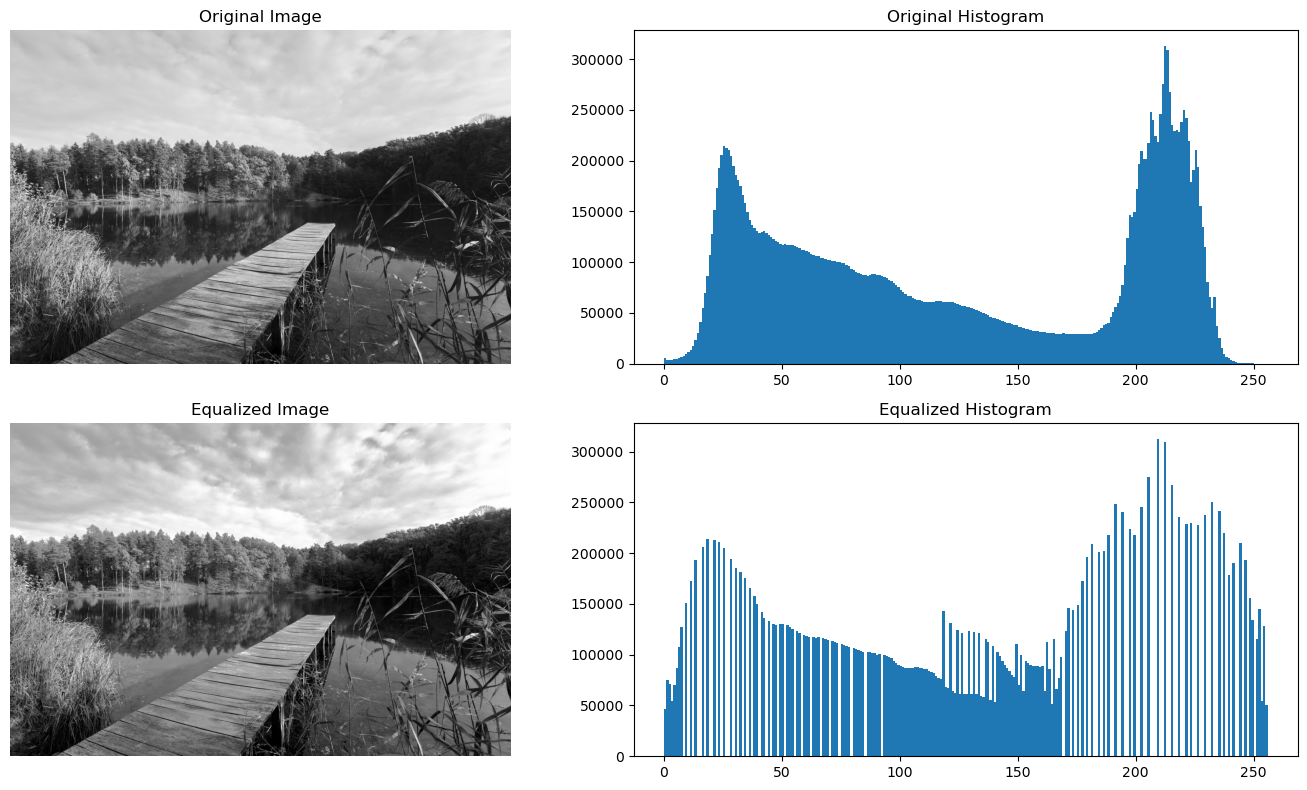

<Figure size 640x480 with 0 Axes>

In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("nature.jpg", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found!")
img_eq = cv2.equalizeHist(img)

fig, axs = plt.subplots(2, 2, figsize=(14, 8))

axs[0,0].imshow(img, cmap='gray')
axs[0,0].set_title("Original Image")
axs[0,0].axis("off")

axs[0,1].hist(img.ravel(), bins=256, range=[0,256])
axs[0,1].set_title("Original Histogram")
axs[1,0].imshow(img_eq, cmap='gray')
axs[1,0].set_title("Equalized Image")
axs[1,0].axis("off")

axs[1,1].hist(img_eq.ravel(), bins=256, range=[0,256])
axs[1,1].set_title("Equalized Histogram")

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

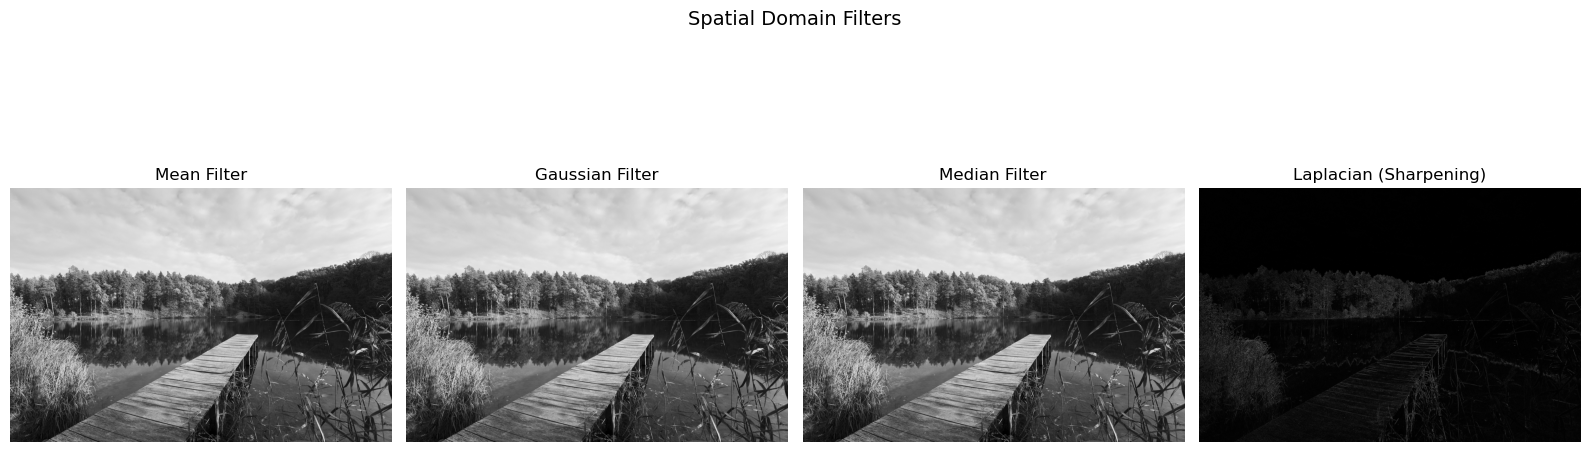

In [88]:
mean      = cv2.blur(img, (3,3))
gaussian  = cv2.GaussianBlur(img, (5,5), 1.0)
median    = cv2.medianBlur(img, 3)
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

filters = [mean, gaussian, median, laplacian]
titles  = ["Mean Filter", "Gaussian Filter", "Median Filter", "Laplacian (Sharpening)"]

plt.figure(figsize=(16,6))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(filters[i], cmap='gray')
    plt.title(titles[i], fontsize=12)
    plt.axis("off")
plt.suptitle("Spatial Domain Filters", fontsize=14)

plt.tight_layout()
plt.show()


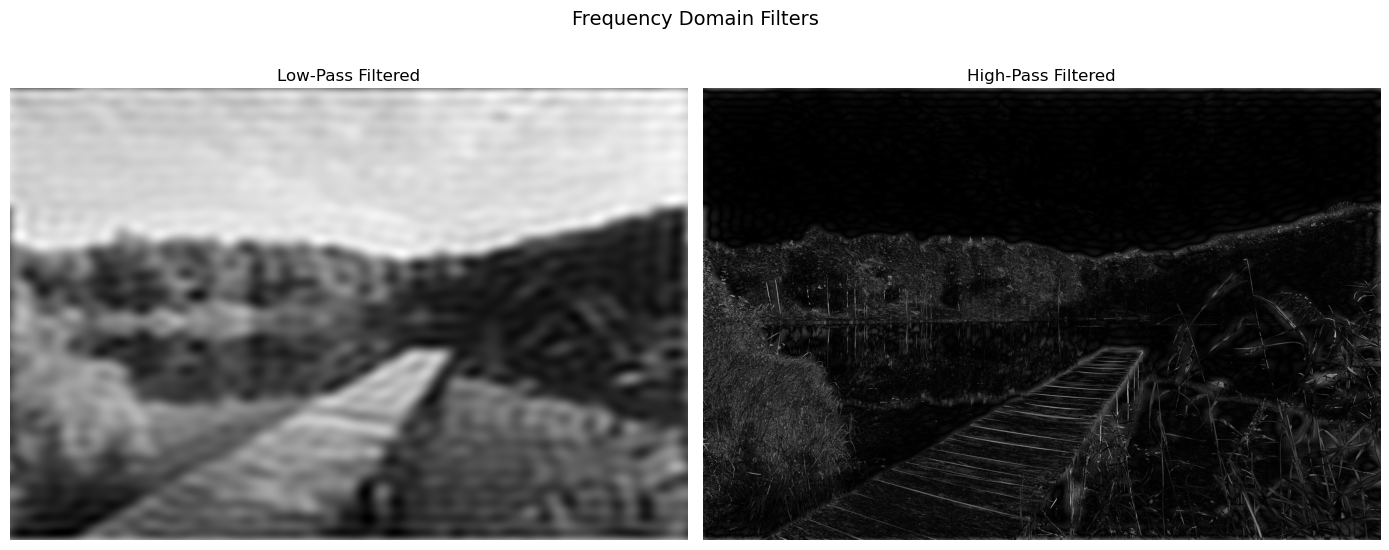

In [89]:
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = rows//2 , cols//2
r = 30

mask_low  = np.zeros((rows, cols, 2), np.uint8)
cv2.circle(mask_low, (ccol, crow), r, (1,1), -1)
mask_high = 1 - mask_low

# Low-pass
low_pass = dft_shift * mask_low
f_ishift = np.fft.ifftshift(low_pass)
img_low = cv2.idft(f_ishift)
img_low = cv2.magnitude(img_low[:,:,0], img_low[:,:,1])

# High-pass
high_pass = dft_shift * mask_high
f_ishift = np.fft.ifftshift(high_pass)
img_high = cv2.idft(f_ishift)
img_high = cv2.magnitude(img_high[:,:,0], img_high[:,:,1])

# Show results
fig, axs = plt.subplots(1, 2, figsize=(14,6))

axs[0].imshow(img_low, cmap='gray')
axs[0].set_title("Low-Pass Filtered")
axs[0].axis("off")

axs[1].imshow(img_high, cmap='gray')
axs[1].set_title("High-Pass Filtered")
axs[1].axis("off")

plt.suptitle("Frequency Domain Filters", fontsize=14)
plt.tight_layout()
plt.show()